In [1]:
import os

import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import numpy as np
import copy

from transforms3d.euler import euler2mat, mat2euler

In [2]:
os.chdir('../run/')

In [3]:
import amc_parser

###  Test parsing

parsing ../data/02/02.asf
parsing ../data/02/02_01.amc


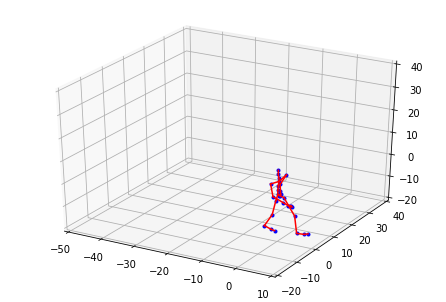

parsing ../data/05/05.asf
parsing ../data/05/05_01.amc


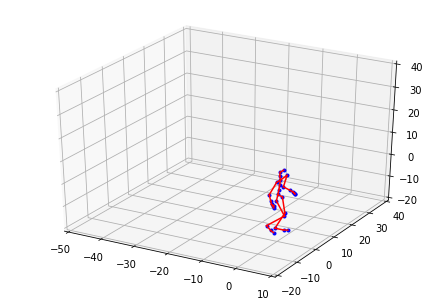

parsing ../data/06/06.asf
parsing ../data/06/06_01.amc


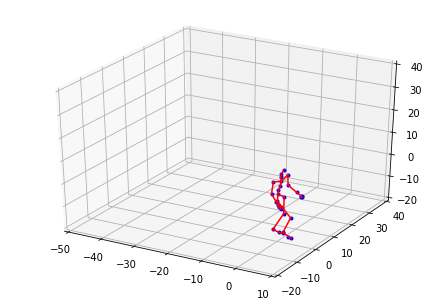

parsing ../data/07/07.asf
parsing ../data/07/07_01.amc


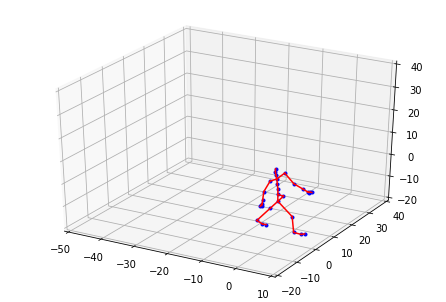

parsing ../data/08/08.asf
parsing ../data/08/08_01.amc


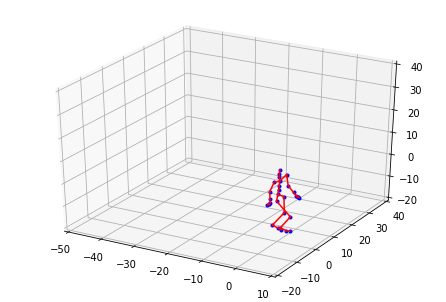

parsing ../data/10/10.asf
parsing ../data/10/10_04.amc


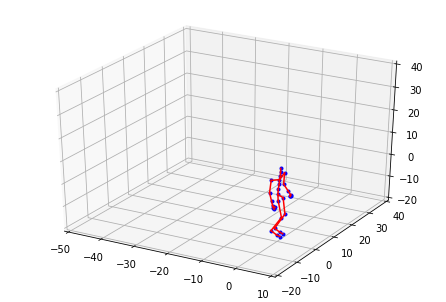

parsing ../data/12/12.asf
parsing ../data/12/12_01.amc


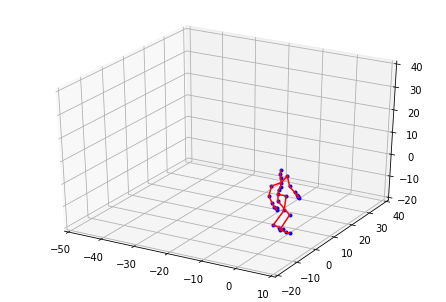

parsing ../data/16/16.asf
parsing ../data/16/16_15.amc


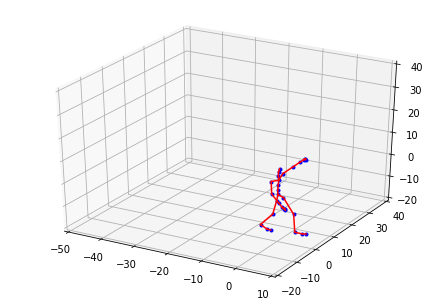

parsing ../data/26/26.asf
parsing ../data/26/26_01.amc


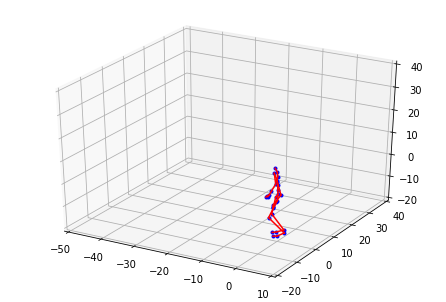

parsing ../data/27/27.asf
parsing ../data/27/27_01.amc


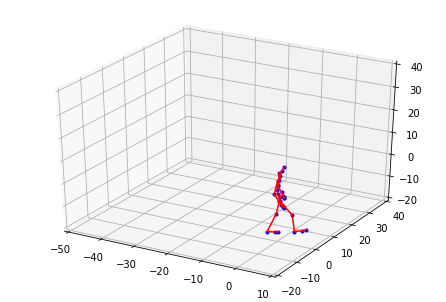

parsing ../data/29/29.asf
parsing ../data/29/29_01.amc


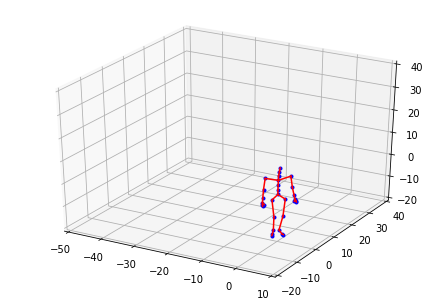

parsing ../data/32/32.asf
parsing ../data/32/32_01.amc


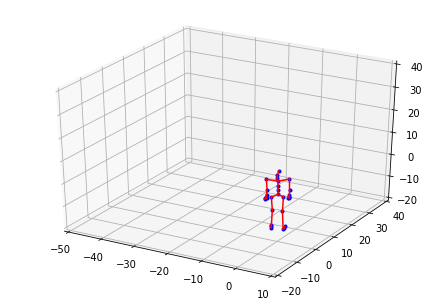

parsing ../data/35/35.asf
parsing ../data/35/35_01.amc


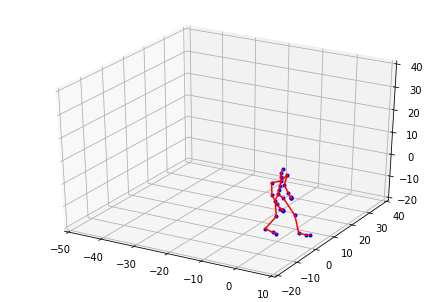

parsing ../data/37/37.asf
parsing ../data/37/37_01.amc


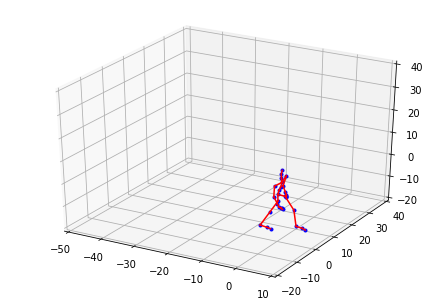

parsing ../data/38/38.asf
parsing ../data/38/38_01.amc


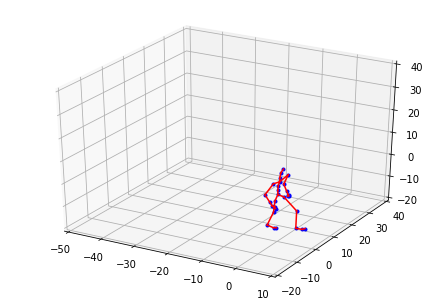

parsing ../data/39/39.asf
parsing ../data/39/39_01.amc


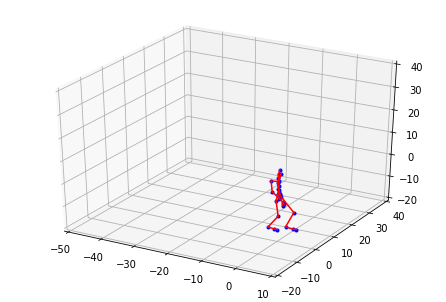

parsing ../data/43/43.asf
parsing ../data/43/43_01.amc


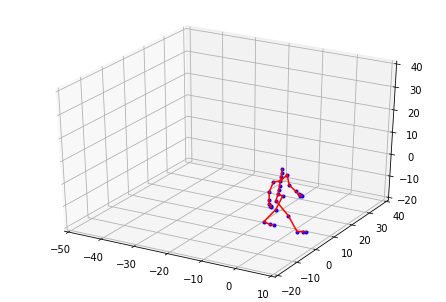

parsing ../data/46/46.asf
parsing ../data/46/46_01.amc


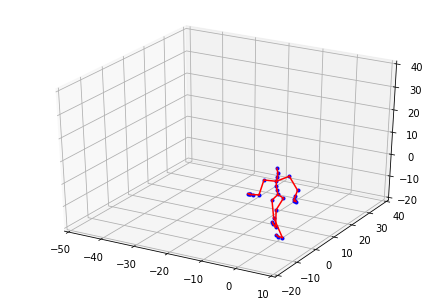

parsing ../data/49/49.asf
parsing ../data/49/49_01.amc


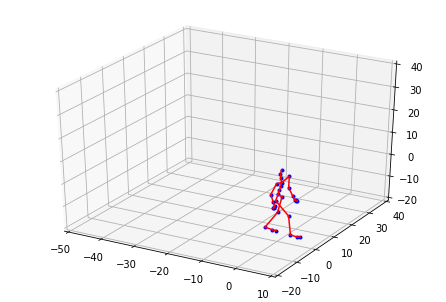

parsing ../data/55/55.asf
parsing ../data/55/55_04.amc


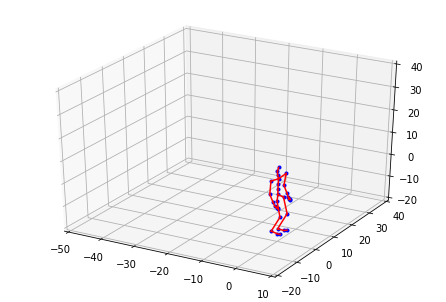

In [4]:
joints, motions = amc_parser.test_all()

### Parse and save to dataframe one person data

In [13]:
df = amc_parser.get_all_data(person_folder='../data/05/')

05_01.amc


In [14]:
df.head()

,root_coord_0,root_coord_1,root_coord_2,root_norm_coord_0,root_norm_coord_1,root_norm_coord_2,root_angle_0,root_angle_1,root_angle_2,root_norm_angle_0,...,lfemur_motion_0,lfemur_motion_1,lfemur_motion_2,ltibia_motion_0,lfoot_motion_0,lfoot_motion_1,ltoes_motion_0,frame,amc_path,person
0,1.01254,16.5239,-34.8207,0.0,0.0,0.0,0.216936,0.021534,-0.016433,6.414774e-17,...,-23.3432,-9.63608,-22.4650,30.0825,-24.2814,21.2184,-4.32702,0,05_01.amc,05
0,1.03164,16.5120,-34.7282,0.0,0.0,0.0,0.218030,0.011882,-0.020985,-5.944623e-17,...,-23.1047,-9.69850,-22.3475,30.1466,-24.3242,22.0342,-5.72676,1,05_01.amc,05
0,1.04751,16.5073,-34.6194,0.0,0.0,0.0,0.209485,0.014256,-0.023896,-4.635322e-17,...,-22.1021,-10.00100,-22.3221,30.1539,-25.0957,22.0265,-5.73675,2,05_01.amc,05
0,1.03293,16.5113,-34.5524,0.0,0.0,0.0,0.209167,0.037976,-0.024819,1.261248e-17,...,-22.0129,-10.05590,-22.0734,30.3394,-25.0950,20.9400,-5.65306,3,05_01.amc,05
0,1.06300,16.5057,-34.4226,0.0,0.0,0.0,0.201659,0.021666,-0.030232,2.669835e-17,...,-20.9293,-10.45660,-22.1086,30.4329,-26.6990,21.4647,-2.72362,4,05_01.amc,05


lfoot_coord_2 - направление движения человека
rfoot_coord_0 - ширина шага
rfoot_coord_1 - высота подъема

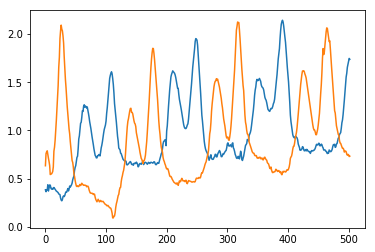

In [28]:
d = df[df['amc_path'] == '05_01.amc']
plt.plot(d['frame'], d['lfoot_coord_1'])
plt.plot(d['frame'], d['rfoot_coord_1'])

чтобы получить размеры из данных amc - необходимо значнеие поделить 0.45 и умножить на 2.54 (т.е. перевести из дюймов в сантиметры)


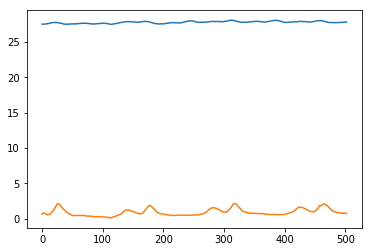

In [31]:

plt.plot(d['frame'], d['head_coord_1'])
plt.plot(d['frame'], d['rfoot_coord_1'])

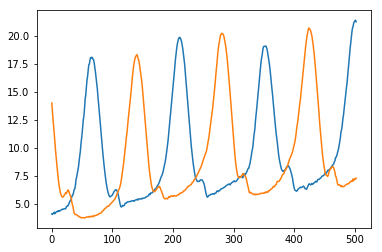

In [34]:
plt.plot(d['frame'], d['ltibia_coord_1']/0.45*2.54)
plt.plot(d['frame'], d['rtibia_coord_1']/0.45*2.54)

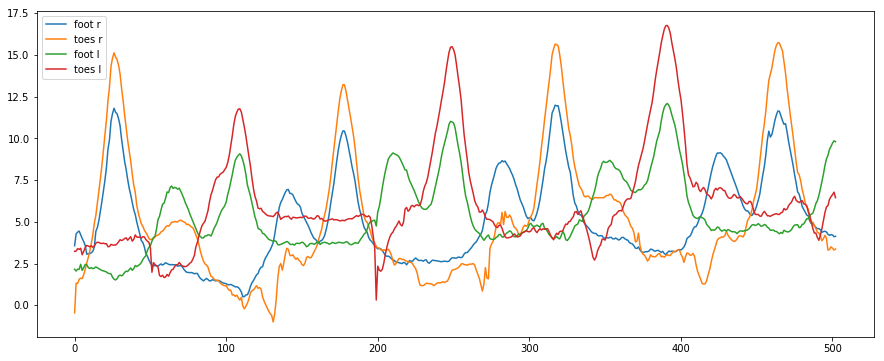

In [45]:
plt.figure(figsize=(15, 6))
plt.plot(d['frame'], d['rfoot_coord_1']/0.45*2.54, label='foot r')
plt.plot(d['frame'], d['rtoes_coord_1']/0.45*2.54, label='toes r')

plt.plot(d['frame'], d['lfoot_coord_1']/0.45*2.54, label='foot l')
plt.plot(d['frame'], d['ltoes_coord_1']/0.45*2.54, label='toes l')

plt.legend(loc=2)

In [35]:
1/2.5*0.45

0.18000000000000002

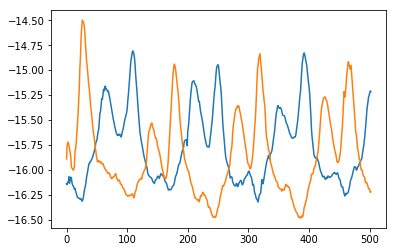

In [25]:
plt.plot(d['frame'], d['lfoot_norm_coord_1'])
plt.plot(d['frame'], d['rfoot_norm_coord_1'])

In [10]:
#считаем длину шага
d = df[df['amc_path'] == '02_01.amc']

In [11]:
d.columns.tolist()

['root_coord_0',
 'root_coord_1',
 'root_coord_2',
 'root_norm_coord_0',
 'root_norm_coord_1',
 'root_norm_coord_2',
 'root_angle_0',
 'root_angle_1',
 'root_angle_2',
 'root_norm_angle_0',
 'root_norm_angle_1',
 'root_norm_angle_2',
 'root_length',
 'lhipjoint_coord_0',
 'lhipjoint_coord_1',
 'lhipjoint_coord_2',
 'lhipjoint_norm_coord_0',
 'lhipjoint_norm_coord_1',
 'lhipjoint_norm_coord_2',
 'lhipjoint_angle_0',
 'lhipjoint_angle_1',
 'lhipjoint_angle_2',
 'lhipjoint_norm_angle_0',
 'lhipjoint_norm_angle_1',
 'lhipjoint_norm_angle_2',
 'lhipjoint_length',
 'lfemur_coord_0',
 'lfemur_coord_1',
 'lfemur_coord_2',
 'lfemur_norm_coord_0',
 'lfemur_norm_coord_1',
 'lfemur_norm_coord_2',
 'lfemur_angle_0',
 'lfemur_angle_1',
 'lfemur_angle_2',
 'lfemur_norm_angle_0',
 'lfemur_norm_angle_1',
 'lfemur_norm_angle_2',
 'lfemur_length',
 'ltibia_coord_0',
 'ltibia_coord_1',
 'ltibia_coord_2',
 'ltibia_norm_coord_0',
 'ltibia_norm_coord_1',
 'ltibia_norm_coord_2',
 'ltibia_angle_0',
 'ltibia_an

In [118]:
#z cood of foot - walking direction axis
left_z = d['lfoot_norm_coord_2'].values.tolist()
right_z = d['rfoot_norm_coord_2'].values.tolist()
for idx, coor in enumerate(left_z):
    if abs(left_z[idx]-right_z[idx])<0.1:
        print ('double support at', idx)

double support at 108
double support at 165


In [177]:
classify(d)

single support at 0
single support at 1
single support at 2
single support at 3
single support at 4
single support at 5
single support at 6
single support at 7
single support at 8
single support at 9
single support at 10
single support at 11
single support at 12
single support at 13
single support at 14
single support at 15
single support at 16
single support at 17
single support at 18
single support at 19
single support at 20
double support at 21
double support at 22
double support at 23
double support at 24
single support at 25
single support at 26
single support at 27
single support at 28
single support at 29
single support at 30
single support at 31
single support at 32
single support at 33
single support at 34
single support at 35
single support at 36
single support at 37
single support at 38
not classifyed
not classifyed
not classifyed
not classifyed
not classifyed
not classifyed
not classifyed
not classifyed
not classifyed
not classifyed
not classifyed
not classifyed
not classif

In [73]:
disp(toes)

47.541370755543255

In [70]:
def disp(val):
    return max(val)-min(val)

In [36]:
def classify(d):
    #ширина шага - ось
    left_foot_x = d['lfoot_norm_coord_0'].values.tolist()
    right_foot_x = d['rfoot_norm_coord_0'].values.tolist()
    left_toes_x = d['ltoes_norm_coord_0'].values.tolist()
    right_toes_x = d['rtoes_norm_coord_0'].values.tolist()
    left_tibia_x = d['ltibia_coord_0'].values.tolist()
    right_tibia_x = d['ltibia_coord_0'].values.tolist()
    #высота подъема - ось вертикаль
    left_foot_z = d['lfoot_norm_coord_1'].values.tolist()
    right_foot_z = d['rfoot_norm_coord_1'].values.tolist()
    left_toes_z = d['ltoes_norm_coord_1'].values.tolist()
    right_toes_z = d['rtoes_norm_coord_1'].values.tolist()
    left_tibia_z = d['ltibia_coord_1'].values.tolist()
    right_tibia_z = d['rtibia_coord_1'].values.tolist()
    #длина шага - ось направления движения
    left_foot_y = d['lfoot_norm_coord_2'].values.tolist()
    right_foot_y = d['rfoot_norm_coord_2'].values.tolist()
    left_toes_y = d['ltoes_norm_coord_2'].values.tolist()
    right_toes_y = d['rtoes_norm_coord_2'].values.tolist()
    left_tibia_y = d['ltibia_coord_2'].values.tolist()
    right_tibia_y = d['rtibia_coord_2'].values.tolist()
    for idx, coor in enumerate(left_foot_y):
        
        if abs(left_tibia_z[idx]-right_tibia_z[idx])<0.18:
            print('double support at', idx)
            #double support
        else if min(left_foot_z)+0.1<left_foot_z[idx] and right_foot_z[idx]>0.1+min(left_foot_z) or min(right_foot_z)+0.1<right_foot_z[idx] and left_foot_z[idx]>0.1+min(right_foot_z):
            print('single support at', idx)
            #toe off phase
        else:
            print('single support at', idx)
            #single support

In [183]:
#z cood of foot 
left_z = d['lfoot_norm_coord_1'].values.tolist()
right_z = d['rfoot_norm_coord_1'].values.tolist()
print(left_z[39])
print(right_z[39])
print(min(right_z))
print(min(left_z))

-16.522888441825845
-15.19450562178617
-16.525346864653656
-16.585444725306985


In [ ]:
                #hell strike
                if abs(left_toes_z[idx]-right_toes_z[idx])>0.1 and abs(left_clavicle_z[idx]-right_clavicle_z[idx])<0.1:
                    print('hell strike at', idx)

In [46]:

j1_x = 65.1067
j2_x = 59.9729
j3_x = 32.927
j4_x = 70.1948
j5_x = 11.4306
j6_x = 10.000 #надо уточнить в электроприборе

j1_y = 0.0121
j2_y = -0.0102
j3_y = -0.005
j4_y = -0.0172
j5_y = 0.0252

j1_z = 48.0069
j2_z = 249.9997
j3_z = 126.6376
j4_z = 123.4789
j5_z = 167.5552
j6_z = 43.000 # + tool length, который надо тоже уточнить

x = j1_x + j2_x + j3_x + j4_x + j5_x + j6_x
y = j1_y + j2_y + j3_y + j4_y + j5_y
z = j1_z + j2_z + j3_z + j4_z + j5_z + j6_z

M = np.array([[1.,0.,0.,x],[0.,1.,0.,y],[0.,0.,1.,z],[0.,0.,0.,1.]])

In [47]:
M

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 2.496320e+02],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 4.900000e-03],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, 7.586783e+02],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00]])